In [1]:
!pip install cvxopt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

    

Text(0.5, 1.0, 'XOR data')

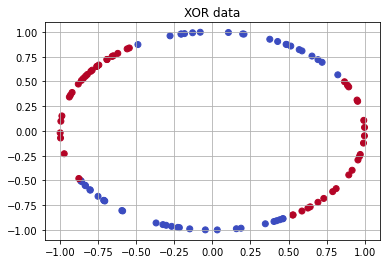

In [3]:
# XOR data
num_data = 100
num_test = 100
XOR_X = 2*np.random.rand(num_data, 2)-1
XOR_X = np.array([x/np.linalg.norm(x) for x in XOR_X])
XOR_rot_y = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_X.T).T])
XOR_Xtest = 2*np.random.rand(num_test, 2)-1
XOR_rot_ytest = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_Xtest.T).T])
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.grid()
plt.title('XOR data')

In [4]:
C = 1e1
X = XOR_X
y = XOR_rot_y
Y = np.array([y]).T
Q = matrix(Y @ Y.T * np.abs(X @ X.T)**2)
p = matrix(-np.ones(y.size))
G = matrix(np.vstack([-np.identity(y.size), np.identity(y.size)]))

h = matrix(np.hstack([np.zeros(y.shape), C*np.ones(y.shape)]))

sol = solvers.qp(Q, p, G, h)

pcost       dcost       gap    pres   dres
 0:  7.2614e+00 -3.7966e+03  7e+03  3e-01  4e-15
 1:  5.0653e+01 -5.7523e+02  7e+02  2e-02  3e-15
 2: -5.1503e+01 -2.0494e+02  2e+02  4e-03  3e-15
 3: -9.6230e+01 -1.6432e+02  7e+01  1e-03  4e-15
 4: -1.1871e+02 -1.4107e+02  2e+01  4e-04  5e-15
 5: -1.2895e+02 -1.3291e+02  4e+00  2e-05  5e-15
 6: -1.3080e+02 -1.3090e+02  1e-01  5e-07  7e-15
 7: -1.3084e+02 -1.3085e+02  9e-03  3e-08  6e-15
 8: -1.3085e+02 -1.3085e+02  8e-04  2e-09  5e-15
 9: -1.3085e+02 -1.3085e+02  2e-05  3e-11  6e-15
Optimal solution found.


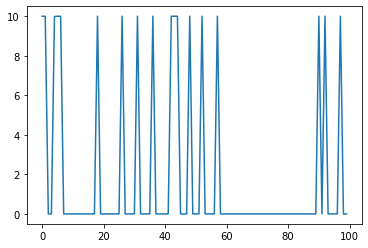

In [5]:
plt.plot(sol['x'])

Text(0.5, 1.0, 'XOR data')

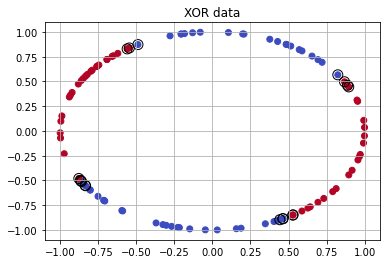

In [6]:
svi = (np.array(sol['x'])>=np.mean(np.array(sol['x']), axis=0)).reshape(-1)
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

In [7]:
from classification.classifier import SVM
from classification.optimizer import CVXOPT
linker = lambda X, Y: X@Y.T
cls = SVM(XOR_X, XOR_rot_y, kernel= 'power2')
cls.optimize(CVXOPT, C=1)

pcost       dcost       gap    pres   dres
 0: -2.3704e+01 -1.5335e+02  5e+02  2e+00  6e-16
 1: -1.5710e+01 -7.5839e+01  7e+01  4e-02  7e-16
 2: -1.9934e+01 -2.8927e+01  9e+00  5e-03  7e-16
 3: -2.2771e+01 -2.5100e+01  2e+00  1e-03  7e-16
 4: -2.3446e+01 -2.4096e+01  7e-01  2e-04  7e-16
 5: -2.3702e+01 -2.3757e+01  6e-02  8e-06  7e-16
 6: -2.3726e+01 -2.3728e+01  2e-03  2e-07  7e-16
 7: -2.3727e+01 -2.3727e+01  6e-05  3e-09  7e-16
 8: -2.3727e+01 -2.3727e+01  3e-06  3e-11  7e-16
Optimal solution found.


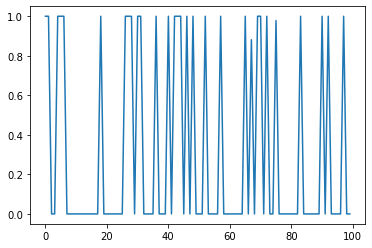

In [8]:
sol = cls.opt_dict
plt.plot(sol['x'])

Text(0.5, 1.0, 'XOR data')

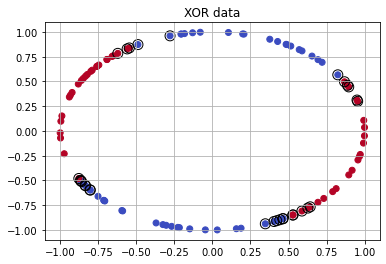

In [9]:
svi = cls.support_vector_index
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

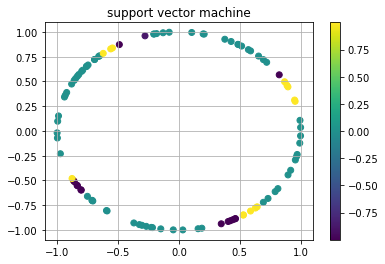

In [10]:
cls.plot()

In [11]:
cls.classify(X)==XOR_rot_y

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [12]:
cls.check_perfomance(XOR_Xtest, XOR_rot_ytest)

0.98

In [14]:
cls.alpha >= 1e-3

array([ True,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False])